In [4]:
#importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing datasets
df = pd.read_csv('C:\\Users\\Subhendu Chakrabarti\\Desktop\\ML_Practice\\My_Data Set\\Fish Market\\Fish.csv')

In [3]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
print("Information about the dataset:",df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.1+ KB
Information about the dataset: None


In [5]:
print(df.describe())

            Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   59.000000   63.400000   68.000000   18.957000    8.142000


In [6]:
import seaborn as sb

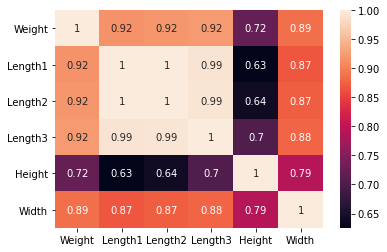

In [7]:
data_corr = df.corr()
sb.heatmap(data_corr,annot=True)

No handles with labels found to put in legend.


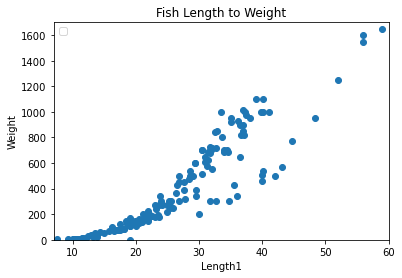

In [8]:
plt.scatter(df['Length1'],df['Weight'])
plt.title("Fish Length to Weight")
plt.xlim(7,60)
plt.ylim(0,1700)
plt.legend()
plt.xlabel("Length1")
plt.ylabel("Weight")
plt.show()

In [9]:
#Modeling
from sklearn import linear_model
regress = linear_model.LinearRegression()
train_x = np.asanyarray(df[['Length1']])
train_y = np.asanyarray(df[['Weight']])
#print(train_x)
#print(train_y)
regress.fit (train_x,train_y)
print ('Intercept is: ',regress.intercept_)
print ('Coefficients is: ', regress.coef_)

Intercept is:  [-462.37507916]
Coefficients is:  [[32.7921639]]


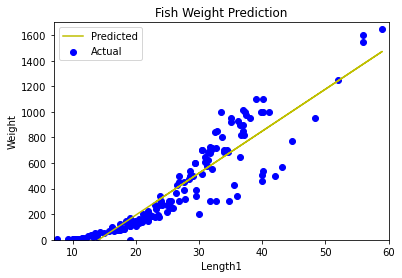

In [10]:
plt.scatter(df.Length1, df.Weight, color='blue', label="Actual")
plt.plot(train_x, regress.coef_[0][0]*train_x + regress.intercept_[0], '-y', label="Predicted")
plt.title("Fish Weight Prediction")
plt.xlim(7,60)
plt.ylim(0,1700)
plt.legend()
plt.xlabel("Length1")
plt.ylabel("Weight")
plt.show()

In [11]:
y_predicted = regress.predict(train_x)
for i in range(0,len(train_x)):
    print(train_y[i],y_predicted[i])
df['Predicted'] = y_predicted
print(y_predicted)
print(df.head())

[242.] [298.40312322]
[290.] [324.63685434]
[340.] [321.35763795]
[363.] [400.0588313]
[430.] [406.61726408]
[450.] [416.45491325]
[500.] [416.45491325]
[390.] [442.68864436]
[450.] [442.68864436]
[500.] [472.20159187]
[475.] [468.92237548]
[500.] [478.76002465]
[500.] [491.87689021]
[340.] [504.99375577]
[600.] [501.71453938]
[600.] [501.71453938]
[700.] [534.50670327]
[700.] [534.50670327]
[610.] [550.90278522]
[650.] [554.18200161]
[575.] [564.01965078]
[685.] [567.29886717]
[620.] [570.57808356]
[680.] [580.41573273]
[700.] [583.69494912]
[725.] [580.41573273]
[720.] [586.97416551]
[714.] [609.92868023]
[850.] [613.20789662]
[1000.] [636.16241135]
[920.] [685.35065719]
[955.] [685.35065719]
[925.] [724.70125387]
[975.] [764.05185054]
[950.] [783.72714888]
[40.] [-39.3561649]
[69.] [78.69562512]
[78.] [111.48778902]
[87.] [134.44230374]
[120.] [147.5591693]
[0.] [160.67603486]
[110.] [163.95525125]
[120.] [173.79290042]
[150.] [206.58506432]
[145.] [209.8642807]
[160.] [209.8642807]

In [12]:
from sklearn import metrics
print('Mean Absolute Error is:', metrics.mean_absolute_error(train_y, y_predicted))
print('Mean Squared Error is:', metrics.mean_squared_error(train_y, y_predicted))
print('Root Mean Squared Error is:', np.sqrt(metrics.mean_squared_error(train_y, y_predicted)))

Mean Absolute Error is: 109.48096093758657
Mean Squared Error is: 20562.256518291095
Root Mean Squared Error is: 143.3954550126715


In [13]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(df[['Length1']])
test_y = np.asanyarray(df[['Weight']])
test_y_predicted = regress.predict(test_x)
print("Mean absolute error (MAE) is:" , np.mean(np.absolute(test_y_predicted - test_y)))
print("Mean square error (MSE) is: " , np.mean((test_y_predicted - test_y) ** 2))
print("R2-score: %.2f (RMSE) is:" , r2_score(test_y, test_y_predicted))

Mean absolute error (MAE) is: 109.48096093758657
Mean square error (MSE) is:  20562.256518291095
R2-score: %.2f (RMSE) is: 0.8385279468768119


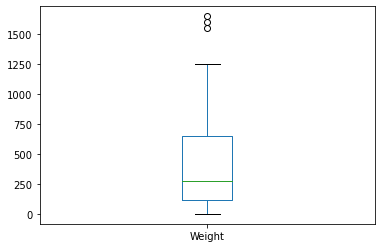

In [14]:
#box Plot visualization
df.plot(x='Height',y='Weight',kind='box')